In [1]:
!pip install tensorflow opencv-python matplotlib scikit-learn


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
#Loading DATASET
TRAIN_DIR = "dataset/TRAIN"  
TEST_DIR = "dataset/TEST"
CLASSES = ['Caries', 'Gingivitis']  
IMG_SIZE = (128, 128)  # Resize 


In [7]:
def load_data(data_dir):
    images, labels = [], []
    for label, class_name in enumerate(CLASSES):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load Training and Testing Data
X_train, y_train = load_data(TRAIN_DIR)
X_test, y_test = load_data(TEST_DIR)

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data: {X_test.shape}, Labels: {y_test.shape}")


Training Data: (1486, 128, 128, 3), Labels: (1486,)
Testing Data: (408, 128, 128, 3), Labels: (408,)


In [9]:
#size
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)


In [11]:
#Model creation /manipulation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(len(CLASSES), activation='softmax')  # Output layer with softmax activation
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\vicke\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20
)


C:\Users\vicke\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - accuracy: 0.4890 - loss: 2.3411 - val_accuracy: 0.6544 - val_loss: 0.6182
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.7199 - loss: 0.5451 - val_accuracy: 0.6520 - val_loss: 0.5998
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.7527 - loss: 0.4742 - val_accuracy: 0.8456 - val_loss: 0.4444
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.7782 - loss: 0.4571 - val_accuracy: 0.8529 - val_loss: 0.4111
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.8008 - loss: 0.4151 - val_accuracy: 0.8554 - val_loss: 0.3903
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.7954 - loss: 0.4585 - val_accuracy: 0.8578 - val_loss: 0.4282
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.8228 - loss: 0.3969 - val_accuracy: 0.8431 - val_loss: 0.4624
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - accuracy: 0.8095 - loss: 0.4139 - val_accu

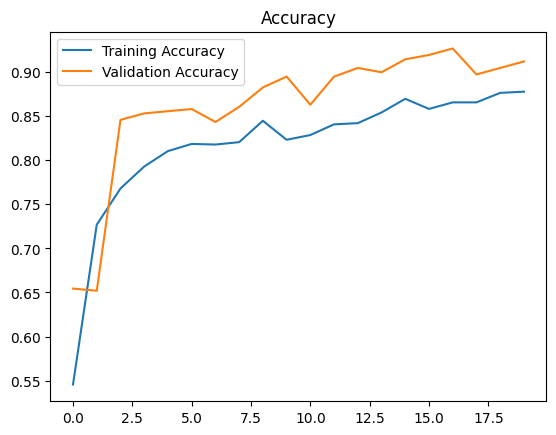

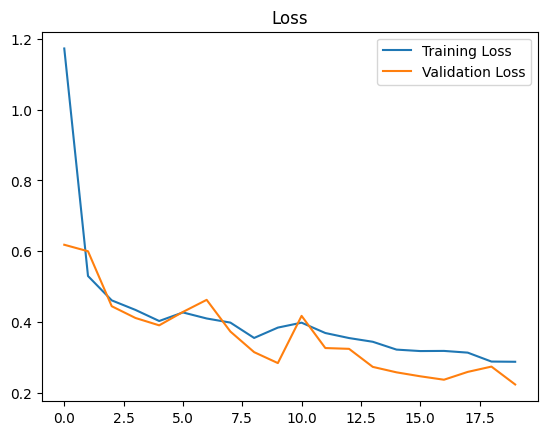

In [15]:
#plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

#plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8487 - loss: 0.3121
Test Accuracy: 0.91
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
              precision    recall  f1-score   support

      Caries       0.96      0.86      0.91       204
  Gingivitis       0.88      0.96      0.92       204

    accuracy                           0.91       408
   macro avg       0.92      0.91      0.91       408
weighted avg       0.92      0.91      0.91       408



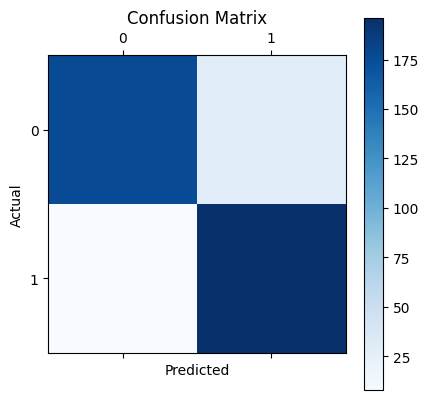

In [19]:
#plot por to test accuracy ,presision,recall,f1-score,support
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions and Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred, target_names=CLASSES))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [21]:
model.save("oral_disease_model.h5")
print("Model saved as 'oral_disease_model.h5'")


Model saved as 'oral_disease_model.h5'


In [53]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img = cv2.resize(img, IMG_SIZE) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return CLASSES[class_idx], prediction[0][class_idx]

# Example Usage 1
image_path = "dataset\TEST\Caries\caries_0_2966.jpg"  
label, confidence = predict_image(image_path)
print(f"Predicted: {label} with confidence {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: Caries with confidence 0.86


<>:12: SyntaxWarning: invalid escape sequence '\T'
<>:12: SyntaxWarning: invalid escape sequence '\T'
C:\Users\vicke\AppData\Local\Temp\ipykernel_21108\3060721914.py:12: SyntaxWarning: invalid escape sequence '\T'
  image_path = "dataset\TEST\Caries\caries_0_2966.jpg"


In [55]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img = cv2.resize(img, IMG_SIZE) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return CLASSES[class_idx], prediction[0][class_idx]
#example 2
image_path = r"dataset\TEST\Gingivitis\498_1.jpg"
label, confidence = predict_image(image_path)
print(f"Predicted: {label} with confidence {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted: Gingivitis with confidence 0.84
